## Here we are trying to perform all the bagging and boosting classification technique on top of Heart Disease Dataset

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [214]:
df=pd.read_csv('heart.csv')

In [215]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [67]:
df.shape

(1025, 14)

In [68]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [69]:
## check null values

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [70]:
import seaborn as sns

In [71]:
## check for correlation

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


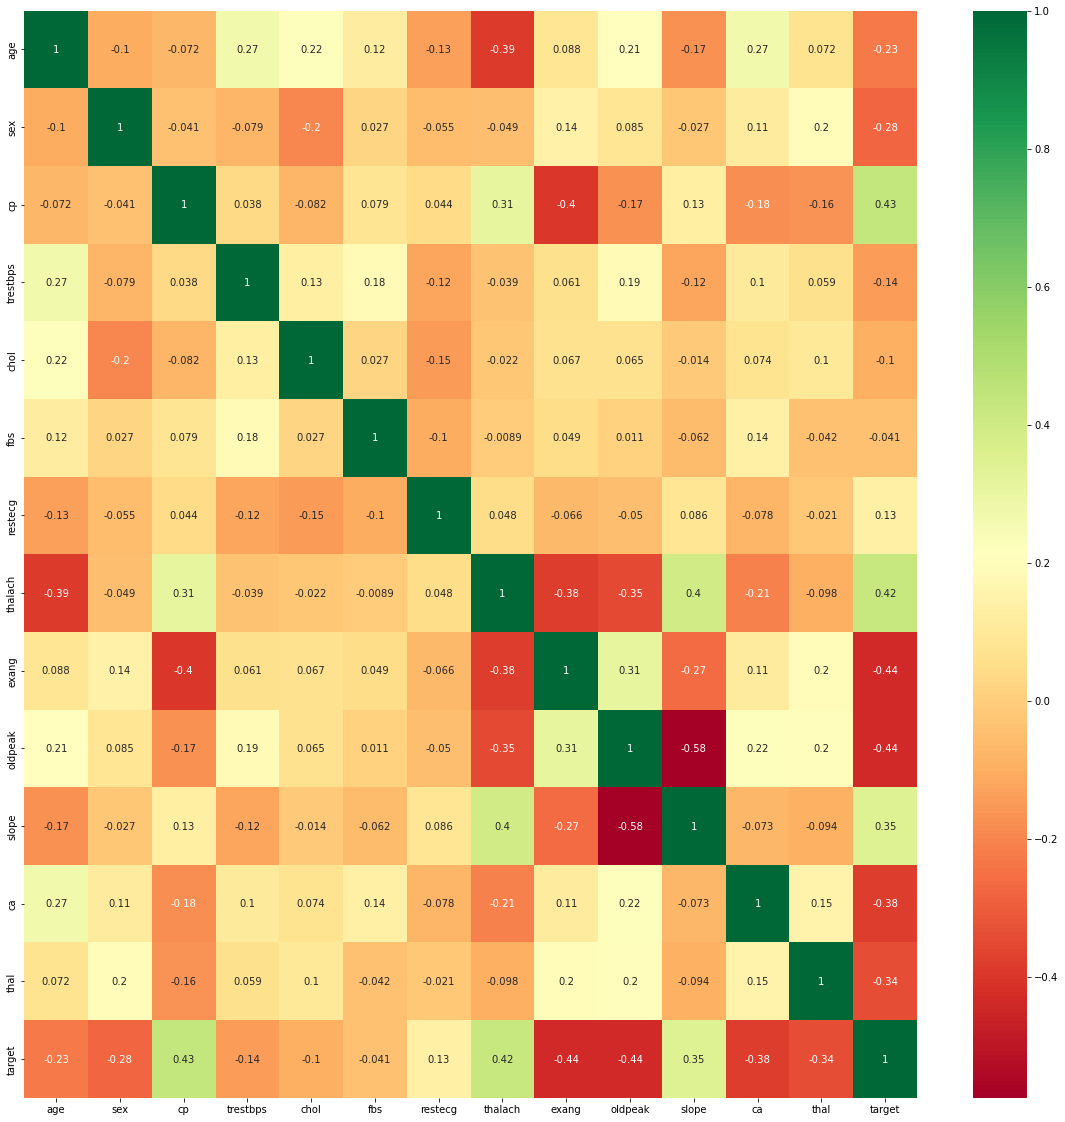

In [72]:
correlation=df.corr()
top_corr_feat= correlation.index
plt.figure(figsize=(20,20))
# plt heat map
graph=sns.heatmap(df[top_corr_feat].corr(),annot=True,cmap='RdYlGn')

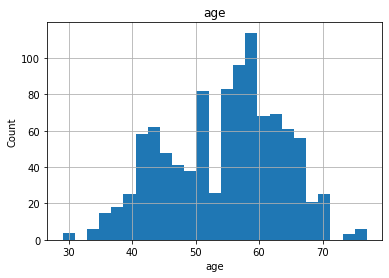

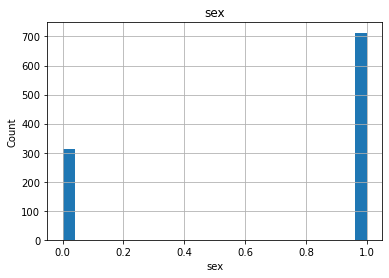

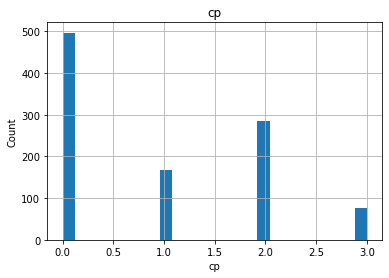

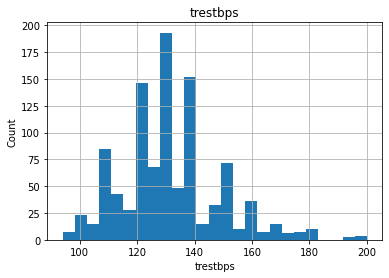

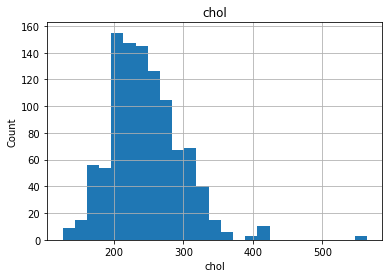

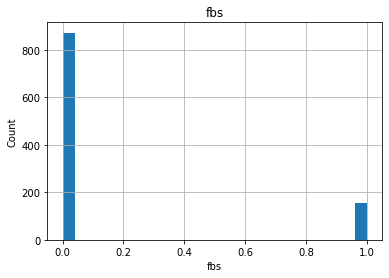

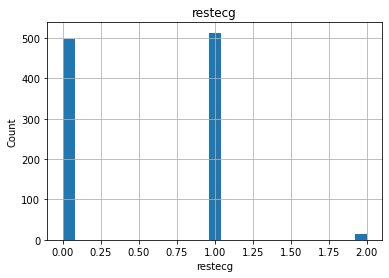

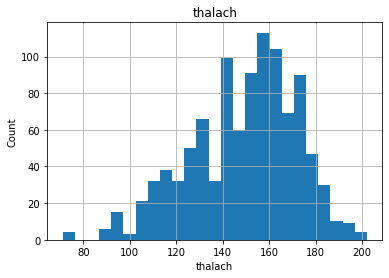

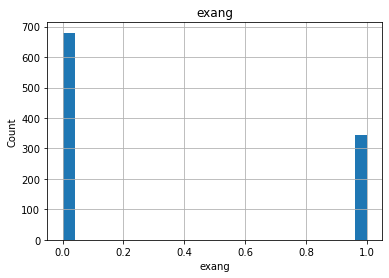

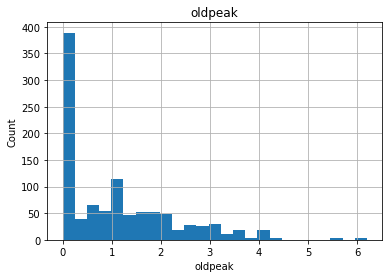

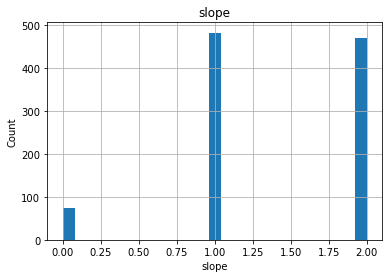

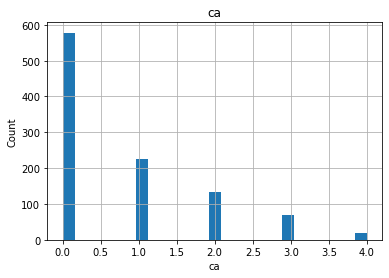

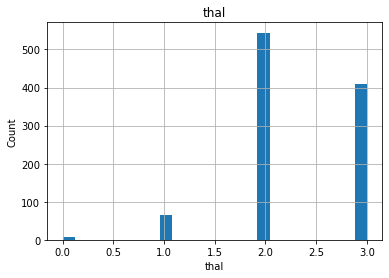

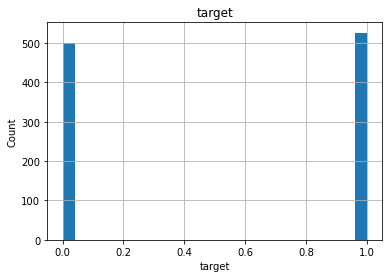

In [91]:
## now analyse the continous feature using histogram to find the distribution
for feature in df:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [92]:
# splitting the independent and dependent column
X=df.drop(['target'], axis=1)
y=df['target']

In [93]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [94]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [216]:
## performing train test split and feature scaling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [217]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=20)

In [218]:
X_train.shape

(768, 13)

In [219]:
X_test.shape

(257, 13)

In [220]:
scaler=StandardScaler()

In [221]:
X_train=scaler.fit_transform(X_train)

In [222]:
X_train

array([[-0.34228063,  0.65384195, -0.92376955, ...,  0.99096863,
        -0.72675946,  1.05668522],
       [-1.22736993,  0.65384195, -0.92376955, ...,  0.99096863,
        -0.72675946,  1.05668522],
       [-0.67418912,  0.65384195, -0.92376955, ...,  0.99096863,
         1.23166604,  1.05668522],
       ...,
       [-1.66991458, -1.5294216 ,  1.04693883, ...,  0.99096863,
        -0.72675946, -0.55991687],
       [-1.11673377,  0.65384195,  0.06158464, ...,  0.99096863,
        -0.72675946,  1.05668522],
       [-0.67418912,  0.65384195,  0.06158464, ..., -2.24072525,
        -0.72675946,  1.05668522]])

In [102]:
## pd.DataFrame(X_train,columns=X.columns)

In [223]:
X_test=scaler.transform(X_test)

In [224]:
X_test

array([[ 0.65344484,  0.65384195, -0.92376955, ..., -0.62487831,
         0.25245329,  1.05668522],
       [ 1.42789798,  0.65384195,  1.04693883, ..., -0.62487831,
        -0.72675946,  1.05668522],
       [ 1.42789798,  0.65384195, -0.92376955, ..., -0.62487831,
         1.23166604, -0.55991687],
       ...,
       [-1.11673377,  0.65384195,  1.04693883, ...,  0.99096863,
        -0.72675946, -0.55991687],
       [-1.33800609,  0.65384195, -0.92376955, ..., -0.62487831,
        -0.72675946, -2.17651897],
       [ 1.42789798, -1.5294216 , -0.92376955, ...,  0.99096863,
         1.23166604, -0.55991687]])

In [209]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [106]:
models={
    'random forest':RandomForestClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'SVC':SVC()
}

In [107]:
def evaluate_model(X_train, X_test, y_train, y_test,models):
    report={}
    for i in range(len(models)):
        model=list(models.values())[i]
        model.fit(X_train,y_train)
        
        y_pred=model.predict(X_test)
        
        acc_score=accuracy_score(y_test,y_pred)
        
        report[list(models.keys())[i]]=acc_score
        
    return report

In [108]:
evaluate_model(X_train, X_test, y_train, y_test,models)

{'random forest': 1.0, 'Decision Tree': 1.0, 'SVC': 0.9066147859922179}

### Here we can see that the Random forest and Decision Tree has done over fitting

# Bagging

In [109]:
from sklearn.ensemble import BaggingClassifier

In [110]:
bagc = BaggingClassifier()

In [111]:
bagc.fit(X_train,y_train)

BaggingClassifier()

In [112]:
y_predc = bagc.predict(X_test)

In [113]:
accuracy_score(y_test,y_predc)

0.9922178988326849

### Bagging using Decision Tree

In [114]:
from sklearn.ensemble import BaggingClassifier

In [119]:
bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=500, # number of trees
    max_samples=0.25, # number of rows to each tree
    bootstrap=True,   # sampling with replacement true
    random_state=42
)

In [120]:
bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.25,
                  n_estimators=500, random_state=42)

In [121]:
y_pred = bag.predict(X_test)

In [122]:
accuracy_score(y_test,y_pred)

0.9571984435797666

### Bagging using SVM

In [123]:
bag = BaggingClassifier(
    base_estimator=SVC(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True,
    random_state=42
)

In [124]:
bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=SVC(), max_samples=0.25, n_estimators=500,
                  random_state=42)

In [125]:
y_pred = bag.predict(X_test)

In [126]:
accuracy_score(y_test,y_pred)

0.8560311284046692

### Applying Grid Search CV in bagging Classification

In [127]:
from sklearn.model_selection import GridSearchCV

In [128]:
parameters = {
    'n_estimators': [50,100,500], 
    'max_samples': [0.1,0.4,0.7,1.0],
    'bootstrap' : [True,False],
    'max_features' : [0.1,0.4,0.7,1.0]
    }

In [129]:
search = GridSearchCV(estimator=BaggingClassifier(), param_grid=parameters, cv=5)

In [130]:

search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [0.1, 0.4, 0.7, 1.0],
                         'max_samples': [0.1, 0.4, 0.7, 1.0],
                         'n_estimators': [50, 100, 500]})

In [131]:

search.best_score_

0.9843986079280196

In [132]:
search.best_params_

{'bootstrap': True,
 'max_features': 0.4,
 'max_samples': 0.7,
 'n_estimators': 500}

### Applying Random Search CV in bagging Classification

In [133]:
from sklearn.model_selection import RandomizedSearchCV

In [134]:
rscv = RandomizedSearchCV(estimator=BaggingClassifier(), param_distributions=parameters, cv=5)

In [135]:
rscv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=BaggingClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': [0.1, 0.4, 0.7, 1.0],
                                        'max_samples': [0.1, 0.4, 0.7, 1.0],
                                        'n_estimators': [50, 100, 500]})

In [138]:
rscv.best_score_

0.9843816314404549

In [139]:
rscv.best_params_

{'n_estimators': 100,
 'max_samples': 0.7,
 'max_features': 0.4,
 'bootstrap': False}

## Random Forest Classification

In [140]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
rf = RandomForestClassifier()

In [142]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [143]:
y_predr = rf.predict(X_test)

In [144]:
accuracy_score(y_test,y_predr)

1.0

### Applying Grid Search CV in Random Forest Classification

In [145]:
params={
    'max_depth':[3,5,8,12],
    'n_estimators':[100,300,500],
    'criterion':['gini','entropy','log_loss'],
    'max_features':['sqrt','log2']
}

In [146]:
grd=GridSearchCV(rf,param_grid=params,scoring='accuracy',cv=5)

In [147]:
grd.fit(X_train,y_train)

D:\Mukul\Python\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Mukul\Python\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Mukul\Python\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "D:\Mukul\Python\Anaconda\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Mukul\Python\Anaconda\lib\site-packages

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 8, 12],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

In [148]:
grd.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 'sqrt',
 'n_estimators': 300}

In [149]:
grd.best_score_

0.985697309226721

### Applying Random Search CV in Random Forest Classification

In [150]:
rsrf = RandomizedSearchCV(estimator=rf, param_distributions=params,scoring='accuracy', cv=5)

In [151]:
rsrf.fit(X_train,y_train)

D:\Mukul\Python\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Mukul\Python\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Mukul\Python\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "D:\Mukul\Python\Anaconda\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Mukul\Python\Anaconda\lib\site-packages\jo

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [3, 5, 8, 12],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [100, 300, 500]},
                   scoring='accuracy')

In [152]:
rsrf.best_params_

{'n_estimators': 500,
 'max_features': 'log2',
 'max_depth': 12,
 'criterion': 'entropy'}

In [153]:
rsrf.best_score_

0.9843986079280198

# Boosting

## Ada Boosting

In [154]:
from sklearn.ensemble import AdaBoostClassifier

In [155]:
adaC=AdaBoostClassifier()

In [156]:
adaC.fit(X_train,y_train)

AdaBoostClassifier()

In [157]:
adaC.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [158]:
y_pred = adaC.predict(X_test)

In [159]:
accuracy_score(y_pred,y_test)

0.8793774319066148

### Applying Grid Search CV in Ada Boosting

In [160]:
params={
    'n_estimators':[100,300,500],
    'learning_rate':[0.1,0.3,0.5,0.7,1.0],
    'algorithm':['SAMME', 'SAMME.R']
}

In [161]:
grd=GridSearchCV(adaC,param_grid=params,scoring='accuracy',cv=5)

In [162]:
grd.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.3, 0.5, 0.7, 1.0],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

In [163]:
grd.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 500}

In [164]:
grd.best_score_

0.9700959171547406

### Applying Random Search CV in Ada Boosting

In [166]:
rnd=RandomizedSearchCV(adaC,param_distributions=params,scoring='accuracy',cv=5)

In [167]:
rnd.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(),
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.1, 0.3, 0.5, 0.7,
                                                          1.0],
                                        'n_estimators': [100, 300, 500]},
                   scoring='accuracy')

In [168]:
rnd.best_params_

{'n_estimators': 500, 'learning_rate': 1.0, 'algorithm': 'SAMME.R'}

In [169]:
rnd.best_score_

0.9700959171547406

### Gradient Boosting

In [170]:
from sklearn.ensemble import GradientBoostingClassifier

In [171]:
gbc=GradientBoostingClassifier()

In [172]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [175]:
gbc.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [173]:
y_predict=gbc.predict(X_test)

In [174]:
accuracy_score(y_pred,y_test)

0.8793774319066148

### Applying Grid Search CV in Graident Boosting

In [176]:
params={
    'loss':['log_loss','deviance','exponential'],
    'learning_rate':[0.1,0.3,0.5,0.7,1.0],
    'n_estimators':[100,300,500],
    'criterion':['friedman_mse','squared_error'],
    'max_features':['sqrt','log2']
}

In [177]:
grd=GridSearchCV(gbc,param_grid=params,cv=5)

In [178]:
grd.fit(X_train,y_train)

D:\Mukul\Python\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
300 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Mukul\Python\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Mukul\Python\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py", line 525, in fit
    self._check_params()
  File "D:\Mukul\Python\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py", line 282, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: L

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.1, 0.3, 0.5, 0.7, 1.0],
                         'loss': ['log_loss', 'deviance', 'exponential'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 300, 500]})

In [179]:
grd.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 1.0,
 'loss': 'exponential',
 'max_features': 'sqrt',
 'n_estimators': 300}

In [180]:
grd.best_score_

0.9830999066293185

### Applying Randomized Search CV in Graident Boosting

In [183]:
rnd=RandomizedSearchCV(gbc,param_distributions=params,cv=5)

In [184]:
rnd.fit(X_train,y_train)

D:\Mukul\Python\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Mukul\Python\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Mukul\Python\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py", line 525, in fit
    self._check_params()
  File "D:\Mukul\Python\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py", line 282, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'learning_rate': [0.1, 0.3, 0.5, 0.7,
                                                          1.0],
                                        'loss': ['log_loss', 'deviance',
                                                 'exponential'],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [100, 300, 500]})

In [185]:
rnd.best_params_

{'n_estimators': 100,
 'max_features': 'sqrt',
 'loss': 'exponential',
 'learning_rate': 0.5,
 'criterion': 'squared_error'}

In [186]:
rnd.best_score_

0.9778966131907308

# XGBoost

In [205]:
import xgboost as xgb

In [206]:
xgbc=xgb.XGBClassifier()

In [207]:
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [208]:
y_predict=xgbc.predict(X_test)

In [210]:
accuracy_score(y_pred,y_test)

0.8793774319066148